In [1]:
import pandas as pd
import openpyxl
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_excel(r'C:\Users\HP\Desktop\week 2\Week2_challenge_data_source.xlsx', engine='openpyxl')

In [3]:
# 1. Top 10 handsets used by the customers
top_handsets = df['Handset Type'].value_counts().head(10)
print("Top 10 Handsets:")
print(top_handsets)

Top 10 Handsets:
Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


In [4]:
# 2. Top 3 handset manufacturers
top_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
print("\nTop 3 Handset Manufacturers:")
print(top_manufacturers)


Top 3 Handset Manufacturers:
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [5]:
# 3. Top 5 handsets per top 3 manufacturers
top_3_manufacturers = top_manufacturers.index
filtered_df = df[df['Handset Manufacturer'].isin(top_3_manufacturers)]
top_handsets_per_manufacturer = filtered_df.groupby('Handset Manufacturer')['Handset Type'].value_counts().groupby(level=0).head(5)
print("\nTop 5 Handsets per Top 3 Manufacturers:")
print(top_handsets_per_manufacturer)


Top 5 Handsets per Top 3 Manufacturers:
Handset Manufacturer  Handset Type                  
Apple                 Apple iPhone 6S (A1688)            9419
                      Apple iPhone 6 (A1586)             9023
                      Apple iPhone 7 (A1778)             6326
                      Apple iPhone Se (A1723)            5187
                      Apple iPhone 8 (A1905)             4993
Huawei                Huawei B528S-23A                  19752
                      Huawei E5180                       2079
                      Huawei P20 Lite Huawei Nova 3E     2021
                      Huawei P20                         1480
                      Huawei Y6 2018                      997
Samsung               Samsung Galaxy S8 (Sm-G950F)       4520
                      Samsung Galaxy A5 Sm-A520F         3724
                      Samsung Galaxy J5 (Sm-J530)        3696
                      Samsung Galaxy J3 (Sm-J330)        3484
                      Samsung Galaxy S

In [6]:
# Task 1.1: Aggregating User Behavior
# Aggregating data per user
user_behavior = df.groupby('MSISDN/Number').agg(
    number_of_sessions=('Bearer Id', 'count'),
    session_duration=('Dur. (ms)', 'sum'),
    total_dl_data=('Total DL (Bytes)', 'sum'),
    total_ul_data=('Total UL (Bytes)', 'sum')
).reset_index()
print("\nUser Behavior Aggregation:")
print(user_behavior.head())


User Behavior Aggregation:
   MSISDN/Number  number_of_sessions  session_duration  total_dl_data  \
0   3.360100e+10                   1          116720.0   8.426375e+08   
1   3.360100e+10                   1          181230.0   1.207552e+08   
2   3.360100e+10                   1          134969.0   5.566597e+08   
3   3.360101e+10                   1           49878.0   4.019932e+08   
4   3.360101e+10                   2           37104.0   1.363130e+09   

   total_ul_data  
0     36053108.0  
1     36104459.0  
2     39306820.0  
3     20327526.0  
4     94280527.0  


# Task 1.2: Exploratory Data Analysis
# Ensure to handle missing values and outliers before these steps.


In [7]:
#  handling missing values (replacing with mean)
df.fillna(df.mean(numeric_only=True), inplace=True)

In [8]:
#  handling outliers (simple method: replacing extreme values)
for col in ['Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)']:
    df[col] = df[col].clip(lower=df[col].quantile(0.01), upper=df[col].quantile(0.99))

In [9]:
# Compute descriptive statistics
descriptive_stats = df.describe()
print("\nDescriptive Statistics:")
print(descriptive_stats)


Descriptive Statistics:
                               Start       Start ms  \
count                         150000  150001.000000   
mean   2019-04-26 12:36:38.953740032     499.188200   
min              2019-04-04 12:01:18       0.000000   
25%    2019-04-25 00:26:00.750000128     250.000000   
50%       2019-04-26 08:51:24.500000     499.000000   
75%    2019-04-27 18:18:59.750000128     749.000000   
max              2019-04-29 07:28:43     999.000000   
std                              NaN     288.610872   

                                 End         End ms      Dur. (ms)  \
count                         150000  150001.000000  150001.000000   
mean   2019-04-27 17:40:08.059673344     498.800880  102909.188269   
min              2019-04-24 22:59:58       0.000000   12472.000000   
25%       2019-04-26 07:30:11.500000     251.000000   57442.000000   
50%              2019-04-27 23:02:05     500.000000   86399.000000   
75%       2019-04-29 07:15:07.500000     750.000000  132430

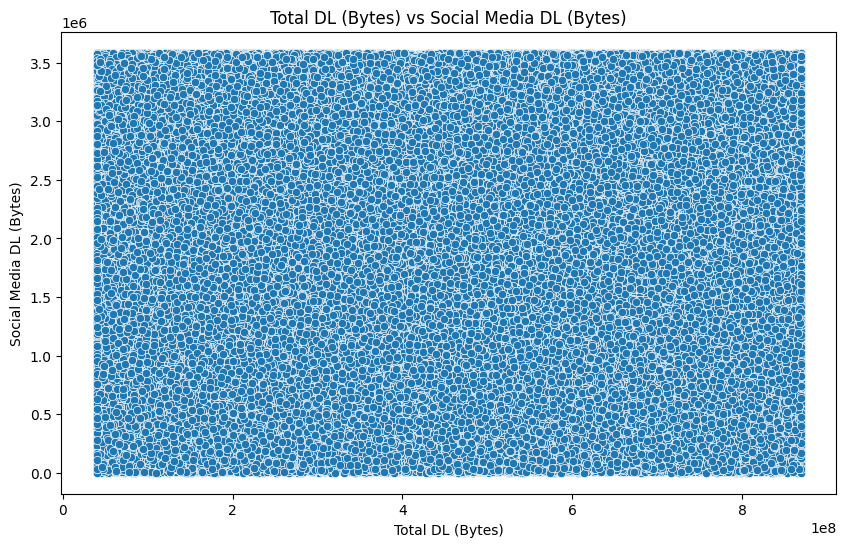

In [10]:
# Bivariate Analysis: Example with Total DL (Bytes) vs. Social Media DL (Bytes)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total DL (Bytes)', y='Social Media DL (Bytes)')
plt.title('Total DL (Bytes) vs Social Media DL (Bytes)')
plt.xlabel('Total DL (Bytes)')
plt.ylabel('Social Media DL (Bytes)')
plt.show()

In [11]:
# Remove extra spaces from column names
df.columns = df.columns.str.strip()
# Recalculate correlation matrix
correlation_matrix = df[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                         Social Media DL (Bytes)  Google DL (Bytes)  \
Social Media DL (Bytes)                 1.000000          -0.001954   
Google DL (Bytes)                      -0.001954           1.000000   
Email DL (Bytes)                        0.004745          -0.000039   
Youtube DL (Bytes)                     -0.001389           0.001760   
Netflix DL (Bytes)                     -0.001817           0.000548   
Gaming DL (Bytes)                       0.001018          -0.001421   
Other DL (Bytes)                        0.006126          -0.002557   

                         Email DL (Bytes)  Youtube DL (Bytes)  \
Social Media DL (Bytes)          0.004745           -0.001389   
Google DL (Bytes)               -0.000039            0.001760   
Email DL (Bytes)                 1.000000            0.001679   
Youtube DL (Bytes)               0.001679            1.000000   
Netflix DL (Bytes)               0.001351            0.001202   
Gaming DL (Bytes)    

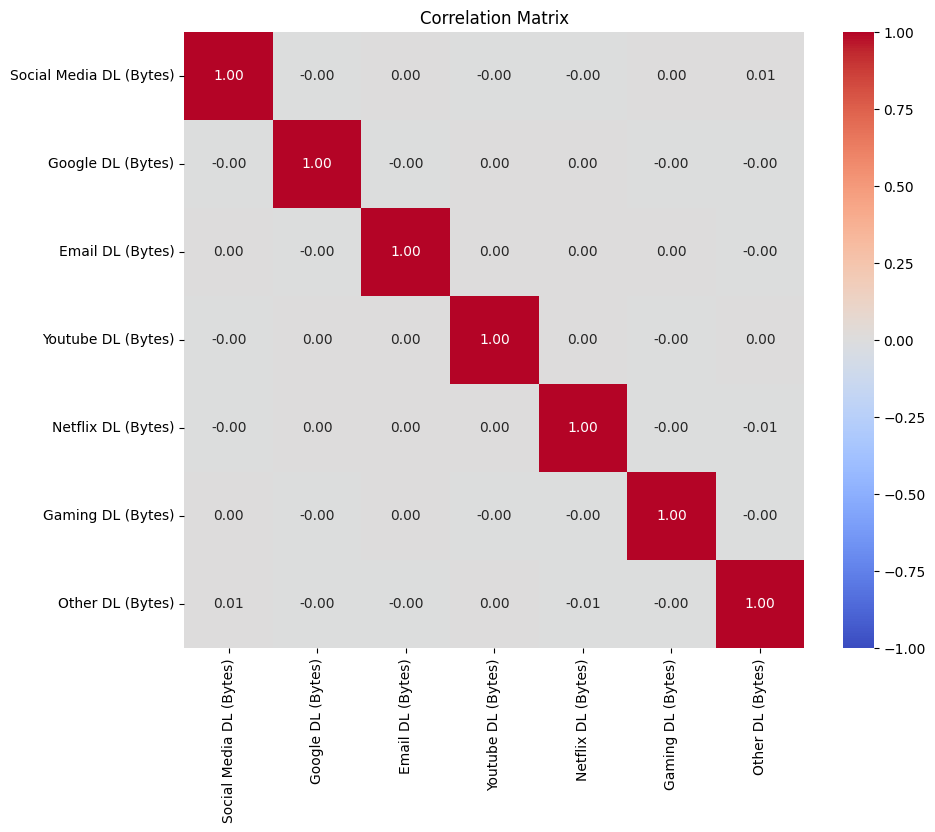

In [12]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
# Set the title and display the plot
plt.title('Correlation Matrix')
plt.show()

In [13]:
# Dimensionality Reduction: Principal Component Analysis (PCA)
# Selecting relevant features for PCA
features = ['Total DL (Bytes)', 'Total UL (Bytes)']
X = df[features].values
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print("\nPCA Explained Variance Ratio:")
print(pca.explained_variance_ratio_)


PCA Explained Variance Ratio:
[0.99791597 0.00208403]


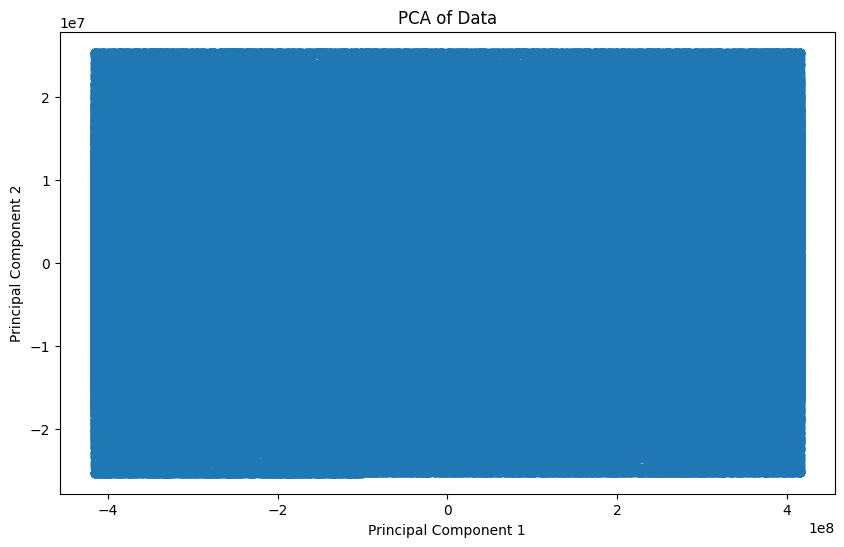

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('PCA of Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()